<a href="https://colab.research.google.com/github/Alexischo/Metodologia/blob/main/METODOLOG%C3%8DA_DataDriven_Approach_LETALIDAD_COVID19_MX_ORIGINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
---
---
---

# **METODOLOGÍA DataDriven Approach**
---
---
---
---
---

***IMPORTACION DE LAS LIBRERIAS***

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c48773b708db977b69678cc880863418aaafba2848c76776d0f74d27c7f7828a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# **METODOLOGÍA Data-Driven Approach para el Análisis de COVID-19 en México**

Este notebook sigue una metodología Data-Driven para explorar y analizar datos relacionados con la pandemia de COVID-19 en México. El objetivo es responder a preguntas clave y obtener información valiosa a partir de los datos disponibles, con un enfoque particular en la identificación de factores de riesgo para la mortalidad por COVID-19 que puedan ser utilizados en un modelo predictivo.





---
---

---
### Preguntas de Investigación/Negocio Clave:

1.  **Tendencias Temporales:**

  ¿Cómo ha evolucionado la pandemia en México a lo largo del tiempo (casos, muertes)?
  
  ¿Existen patrones temporales?
---


2.  **Impacto Demográfico y Comorbilidades:**

  ¿Cuál es la distribución por edad y sexo de los casos?

  ¿Cómo influyen la edad, el sexo y las comorbilidades comunes (diabetes, hipertensión, obesidad, etc.) en el riesgo de mortalidad por COVID-19?

---
3.  **Distribución Geográfica:**

  ¿Cómo varían los casos y la letalidad entre los estados mexicanos?

---
4.  **Análisis de Supervivencia:**

  ¿Existen diferencias en el tiempo de supervivencia hasta el fallecimiento según el sexo o la presencia de comorbilidades?

---
5.  **Calidad de Datos:**

  ¿Cuáles son los problemas de calidad de datos que necesitan ser abordados?

---
6.  **Modelado Predictivo:**

  ¿Es posible construir un modelo predictivo que estime el riesgo de mortalidad por COVID-19 basado en características demográficas y comorbilidades?

# **CODIGO**

**PASO 1: Recopilación de Datos**

Carga los archivos CSV proporcionados en DataFrames de pandas.

In [ ]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Metodologias de IN - COVID/COVID BD'

# CARGANDO LOS DATOS
try:
    print("Cargando datos: CASOS CONFIRMADOS")
    df_casos_confirmados = pd.read_csv(f'{data_dir}/casos_confirmados.csv')
    print("Primeras filas de df_casos_confirmados:")
    display(df_casos_confirmados.head())
except FileNotFoundError:
    print(f"Error: casos_confirmados.csv no encontrado en {data_dir}")

try:
    print("\nCargando datos: COVID MX")
    df_covid_mx = pd.read_csv(f'{data_dir}/covid_mx.csv')
    print("Primeras filas de df_covid_mx:")
    display(df_covid_mx.head())
except FileNotFoundError:
    print(f"Error: covid_mx.csv no encontrado en {data_dir}")

try:
    print("\nCargando datos: COVID 19 GENERAL MX")
    df_covid_general_mx = pd.read_csv(f'{data_dir}/covid-19_general_MX.csv')
    print("Primeras filas de df_covid_general_mx:")
    display(df_covid_general_mx.head())
except FileNotFoundError:
    print(f"Error: covid-19_general_MX.csv no encontrado en {data_dir}")

try:
    print("\nCargando datos: ENTIDADES")
    df_entidades = pd.read_csv(f'{data_dir}/ENTIDADES.csv')
    print("Primeras filas de df_entidades:")
    display(df_entidades.head())
except FileNotFoundError:
    print(f"Error: ENTIDADES.csv no encontrado en {data_dir}")

try:
    print("\nCargando datos: NACIONALIDAD")
    df_nacionalidad = pd.read_csv(f'{data_dir}/NACIONALIDAD.csv')
    print("Primeras filas de df_nacionalidad:")
    display(df_nacionalidad.head())
except FileNotFoundError:
    print(f"Error: NACIONALIDAD.csv no encontrado en {data_dir}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cargando datos: CASOS CONFIRMADOS
Primeras filas de df_casos_confirmados:


,Unnamed: 0,State,Sex,Age,Date,Confirmed
0,0,distrito federal,MASCULINO,28,2020-03-23,1
1,1,distrito federal,MASCULINO,49,2020-04-13,1
2,2,chihuahua,FEMENINO,67,2020-04-15,1
3,3,veracruz de ignacio de la llave,FEMENINO,41,2020-04-27,1
4,4,méxico,MASCULINO,43,2020-06-06,1



Cargando datos: COVID MX
Primeras filas de df_covid_mx:


,Confirmed Cases,Deceased,Dates
0,3,0,28-Feb-2020
1,4,0,29-Feb-2020
2,5,0,01-Mar-2020
3,5,0,02-Mar-2020
4,5,0,03-Mar-2020



Cargando datos: COVID 19 GENERAL MX
Primeras filas de df_covid_general_mx:


,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,2,1,2,2,99,1,2
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,1,2,2,1,2,2,99,1,2
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,1,2,2,2,2,99,1,97
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,2,1,1,2



Cargando datos: ENTIDADES
Primeras filas de df_entidades:


,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL



Cargando datos: NACIONALIDAD
Primeras filas de df_nacionalidad:


,CLAVE,DESCRIPCIÓN
0,1,MEXICANA
1,2,EXTRANJERA
2,99,NO ESPECIFICADO


**PASO 2: Limpieza y Preprocesamiento de Datos**

**Razonamiento:**


Preparar los datos para el análisis abordando valores faltantes, inconsistencias y posibles valores atípicos. Se combinan los DataFrames relevantes para un análisis unificado.

In [ ]:
# Convertir columnas de fecha a tipo datetime
df_covid_mx['Dates'] = pd.to_datetime(df_covid_mx['Dates'])
df_casos_confirmados['Date'] = pd.to_datetime(df_casos_confirmados['Date'])
df_covid_general_mx['FECHA_INGRESO'] = pd.to_datetime(df_covid_general_mx['FECHA_INGRESO'])
df_covid_general_mx['FECHA_SINTOMAS'] = pd.to_datetime(df_covid_general_mx['FECHA_SINTOMAS'])
df_covid_general_mx['FECHA_DEF'] = pd.to_datetime(df_covid_general_mx['FECHA_DEF'], errors='coerce') # Usar errors='coerce' para manejar errores de formato

# Combinar DataFrames relevantes para el análisis principal
df_merged = pd.merge(df_covid_general_mx, df_entidades, left_on='ENTIDAD_RES', right_on='CLAVE_ENTIDAD', how='left')
df_merged = pd.merge(df_merged, df_nacionalidad, left_on='NACIONALIDAD', right_on='CLAVE', how='left')

# Imputar valores faltantes en la columna 'EDAD' con la mediana (sección de tu código anterior)
# Razonamiento: La mediana es menos sensible a valores atípicos que la media.
df_merged['EDAD'].fillna(df_merged['EDAD'].median(), inplace=True)

# Eliminar filas donde FECHA_INGRESO es posterior a FECHA_SINTOMAS (sección de tu código anterior)
# Razonamiento: Esta es una inconsistencia lógica en los datos.
df_merged = df_merged[df_merged['FECHA_INGRESO'] <= df_merged['FECHA_SINTOMAS']]

# Eliminar valores atípicos en la columna 'EDAD' (mayores de 120 años) (sección de tu código anterior)
# Razonamiento: Edades superiores a 120 años son poco probables y pueden distorsionar el análisis.
df_merged = df_merged[df_merged['EDAD'] <= 120]

# Manejar valores faltantes en otras columnas relevantes si es necesario.
# Por ejemplo, para columnas de comorbilidades, puedes imputar 0 (ausencia de comorbilidad)
comorbidity_cols = ['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for col in comorbidity_cols:
    if col in df_merged.columns:
        df_merged[col].fillna(0, inplace=True) # Asumiendo que NaN significa ausencia de la condición
    else:
        print(f"Advertencia: Columna '{col}' de comorbilidad no encontrada.")


# Considerar cómo manejar otros valores faltantes (ej. en columnas de resultados de pruebas, etc.)
# Por ahora, nos enfocaremos en las columnas principales para el análisis de riesgo.

print("Primeras filas del DataFrame combinado después de la limpieza:")
display(df_merged.head())
print("\nInformación del DataFrame combinado después de la limpieza:")
df_merged.info()
print("\nConteo de valores faltantes después de la limpieza:")
print(df_merged.isnull().sum())

<ipython-input-6-cb7afc4ed7e6>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_covid_general_mx['FECHA_DEF'] = pd.to_datetime(df_covid_general_mx['FECHA_DEF'], errors='coerce') # Usar errors='coerce' para manejar errores de formato


Primeras filas del DataFrame combinado después de la limpieza:


<ipython-input-6-cb7afc4ed7e6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['EDAD'].fillna(df_merged['EDAD'].median(), inplace=True)
<ipython-input-6-cb7afc4ed7e6>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,CLAVE,DESCRIPCIÓN
8,8,4,14,2,14,2,2020-03-20,2020-03-20,2020-05-02,2,...,2,2,99,1,2,14,JALISCO,JC,1,MEXICANA
23,23,4,9,2,15,2,2020-04-20,2020-04-20,2020-04-23,2,...,2,2,99,1,2,15,MÉXICO,MC,1,MEXICANA
44,44,4,9,2,9,1,2020-04-26,2020-04-26,2020-05-01,97,...,2,2,99,1,97,9,CIUDAD DE MÉXICO,DF,1,MEXICANA
57,57,4,25,2,25,2,2020-05-03,2020-05-03,2020-05-15,2,...,2,2,99,1,2,25,SINALOA,SL,1,MEXICANA
60,60,4,23,1,23,2,2020-04-12,2020-04-12,NaT,2,...,2,1,99,1,2,23,QUINTANA ROO,QR,1,MEXICANA



Información del DataFrame combinado después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 135488 entries, 8 to 879591
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          135488 non-null  int64         
 1   SECTOR              135488 non-null  int64         
 2   ENTIDAD_UM          135488 non-null  int64         
 3   SEXO                135488 non-null  int64         
 4   ENTIDAD_RES         135488 non-null  int64         
 5   TIPO_PACIENTE       135488 non-null  int64         
 6   FECHA_INGRESO       135488 non-null  datetime64[ns]
 7   FECHA_SINTOMAS      135488 non-null  datetime64[ns]
 8   FECHA_DEF           11101 non-null   datetime64[ns]
 9   INTUBADO            135488 non-null  int64         
 10  NEUMONIA            135488 non-null  int64         
 11  EDAD                135488 non-null  int64         
 12  NACIONALIDAD        135488 non

**Paso 3: Exploración de Datos (EDA)**

**Razonamiento:**

  Comprender la estructura, contenido y características principales de los datos limpios, identificar patrones iniciales y posibles áreas para un análisis más profundo.


--- Exploración inicial del DataFrame combinado ---
<class 'pandas.core.frame.DataFrame'>
Index: 135488 entries, 8 to 879591
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          135488 non-null  int64         
 1   SECTOR              135488 non-null  int64         
 2   ENTIDAD_UM          135488 non-null  int64         
 3   SEXO                135488 non-null  int64         
 4   ENTIDAD_RES         135488 non-null  int64         
 5   TIPO_PACIENTE       135488 non-null  int64         
 6   FECHA_INGRESO       135488 non-null  datetime64[ns]
 7   FECHA_SINTOMAS      135488 non-null  datetime64[ns]
 8   FECHA_DEF           11101 non-null   datetime64[ns]
 9   INTUBADO            135488 non-null  int64         
 10  NEUMONIA            135488 non-null  int64         
 11  EDAD                135488 non-null  int64         
 12  NACIONALIDAD        135488 non-null  i

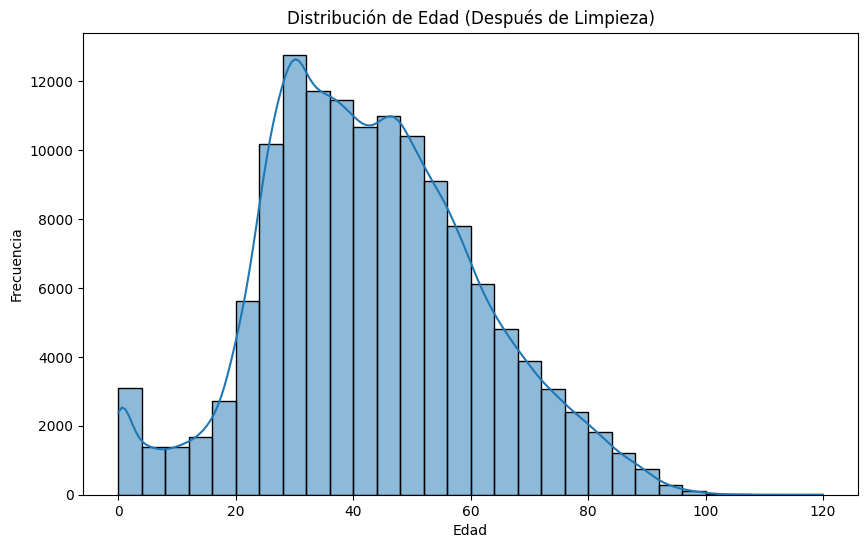

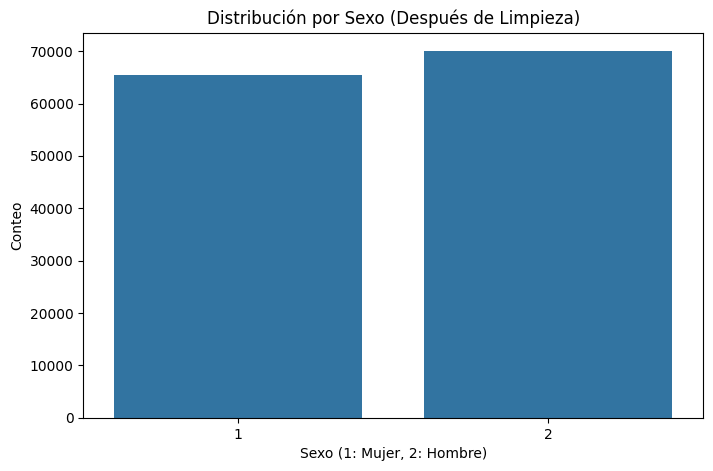

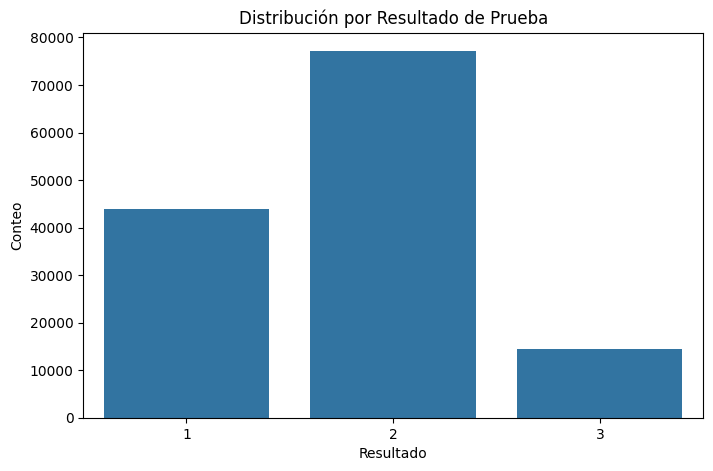

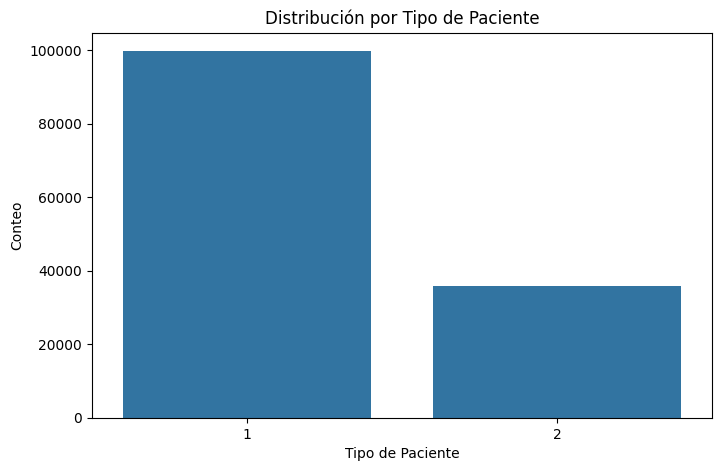

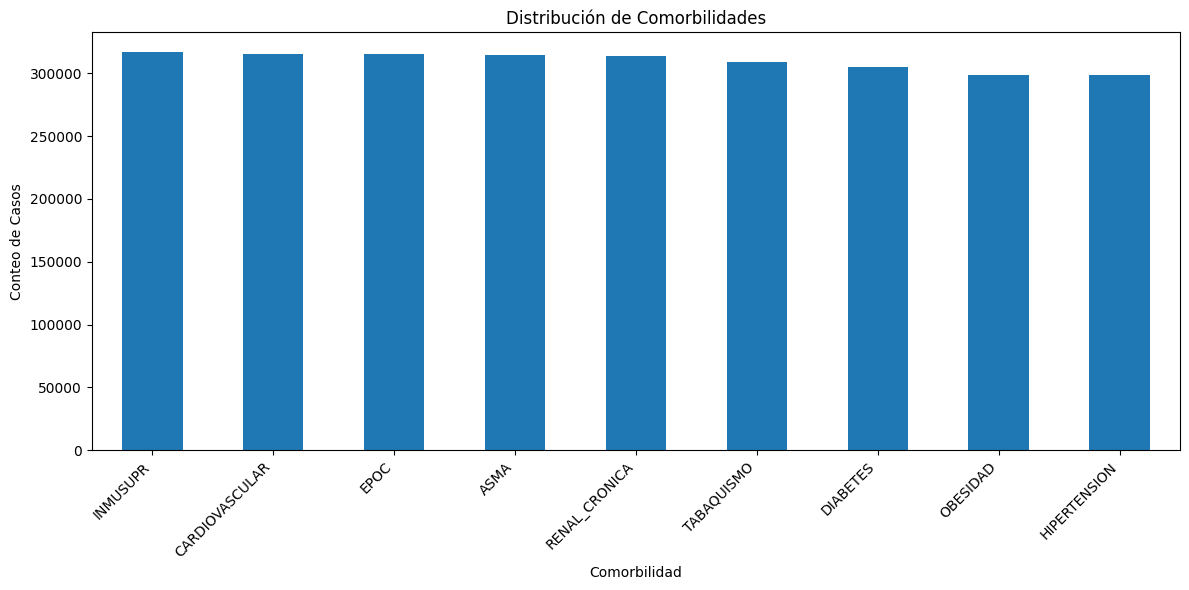

In [ ]:
# Información general del DataFrame combinado
print("\n--- Exploración inicial del DataFrame combinado ---")
df_merged.info()

# Estadísticas descriptivas para columnas numéricas
print("\n--- Estadísticas descriptivas de columnas numéricas ---")
print(df_merged.describe())

# Estadísticas descriptivas para columnas categóricas
print("\n--- Estadísticas descriptivas de columnas categóricas ---")
print(df_merged.describe(include='object'))

# Conteo de valores únicos en columnas clave
print("\n--- Conteo de valores únicos en columnas clave ---")
print("SEXO:", df_merged['SEXO'].nunique())
print("RESULTADO:", df_merged['RESULTADO'].nunique())
print("ENTIDAD_FEDERATIVA:", df_merged['ENTIDAD_FEDERATIVA'].nunique())
print("TIPO_PACIENTE:", df_merged['TIPO_PACIENTE'].nunique())


# Verificar la distribución de la variable objetivo (fallecimiento)
print("\n--- Distribución de la variable objetivo (FECHA_DEF no nula) ---")
print(df_merged['FECHA_DEF'].notna().value_counts())
print(f"Porcentaje de fallecimientos: {(df_merged['FECHA_DEF'].notna().sum() / len(df_merged)) * 100:.2f}%")

# Distribución de edades después de la limpieza
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['EDAD'], kde=True, bins=30)
plt.title('Distribución de Edad (Después de Limpieza)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de SEXO después de la limpieza
plt.figure(figsize=(8, 5))
sns.countplot(x='SEXO', data=df_merged)
plt.title('Distribución por Sexo (Después de Limpieza)')
plt.xlabel('Sexo (1: Mujer, 2: Hombre)')
plt.ylabel('Conteo')
plt.show()

# Distribución de RESULTADO
plt.figure(figsize=(8, 5))
sns.countplot(x='RESULTADO', data=df_merged)
plt.title('Distribución por Resultado de Prueba')
plt.xlabel('Resultado')
plt.ylabel('Conteo')
plt.show()

# Distribución de TIPO_PACIENTE
plt.figure(figsize=(8, 5))
sns.countplot(x='TIPO_PACIENTE', data=df_merged)
plt.title('Distribución por Tipo de Paciente')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Conteo')
plt.show()

# Explorar la distribución de comorbilidades
comorbidity_cols = ['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
comorbidity_counts = df_merged[comorbidity_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
comorbidity_counts.plot(kind='bar')
plt.title('Distribución de Comorbilidades')
plt.xlabel('Comorbilidad')
plt.ylabel('Conteo de Casos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Paso 4: Análisis de Datos**

**Razonamiento:**

Realizar análisis específicos para abordar las preguntas de investigación clave, cuantificando relaciones y patrones en los datos.

análisis más específicos para responder a las preguntas de investigación.

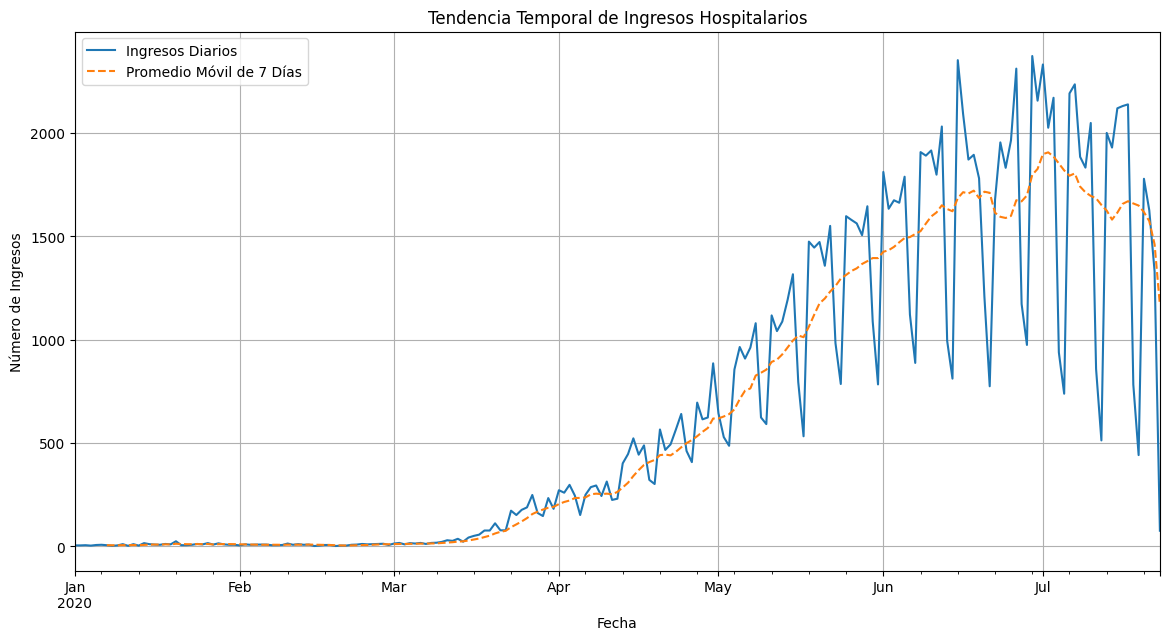

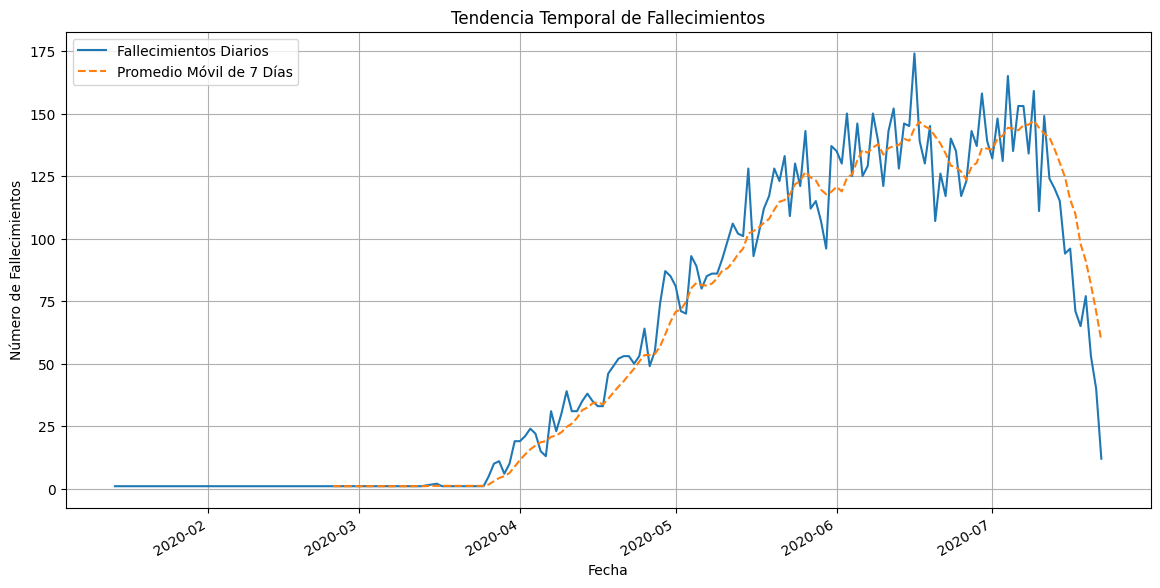


--- Letalidad por Grupo de Edad ---
Grupo_Edad
0-17      2.365294
18-29     0.847966
30-44     2.259092
45-59     8.821962
60-74    24.379996
75+      32.647219
Name: FECHA_DEF, dtype: float64


<ipython-input-8-de1e544e5766>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lethality_by_age_group = df_merged.groupby('Grupo_Edad')['FECHA_DEF'].apply(lambda x: (x.notna().sum() / len(x)) * 100 if len(x) > 0 else 0)


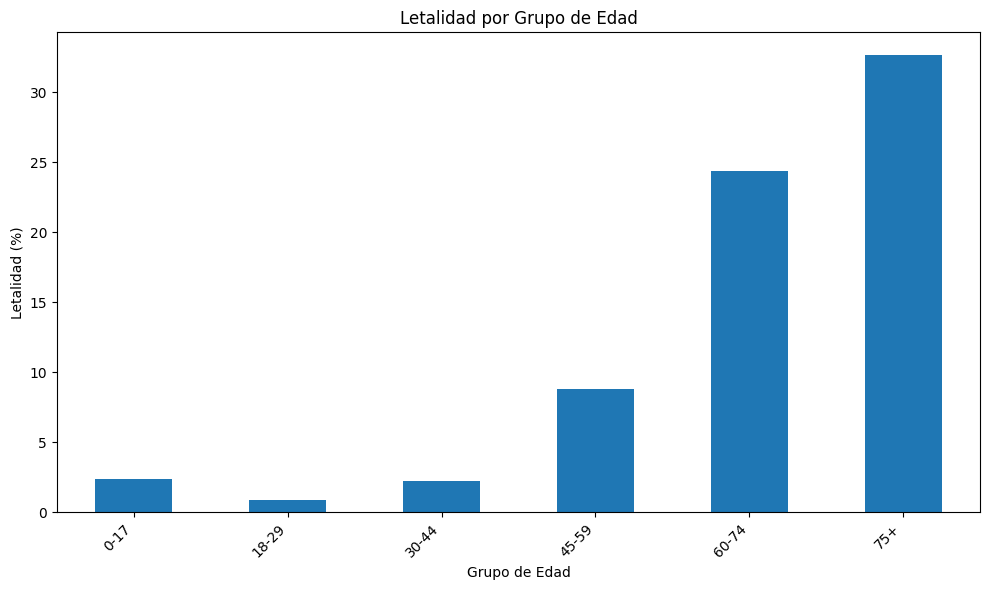


--- Letalidad por Sexo ---
SEXO
1    6.497335
2    9.779333
Name: FECHA_DEF, dtype: float64


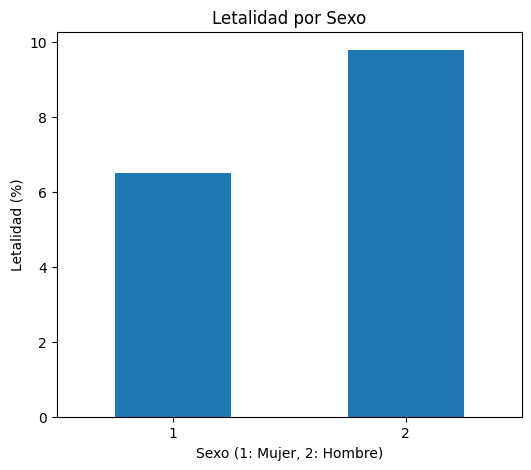


--- Letalidad por Comorbilidad ---
RENAL_CRONICA     30.575741
EPOC              30.483112
DIABETES          24.919235
CARDIOVASCULAR    24.209246
HIPERTENSION      22.710097
INMUSUPR          19.493583
OBESIDAD          13.343595
TABAQUISMO         9.910956
ASMA               6.992777
dtype: float64


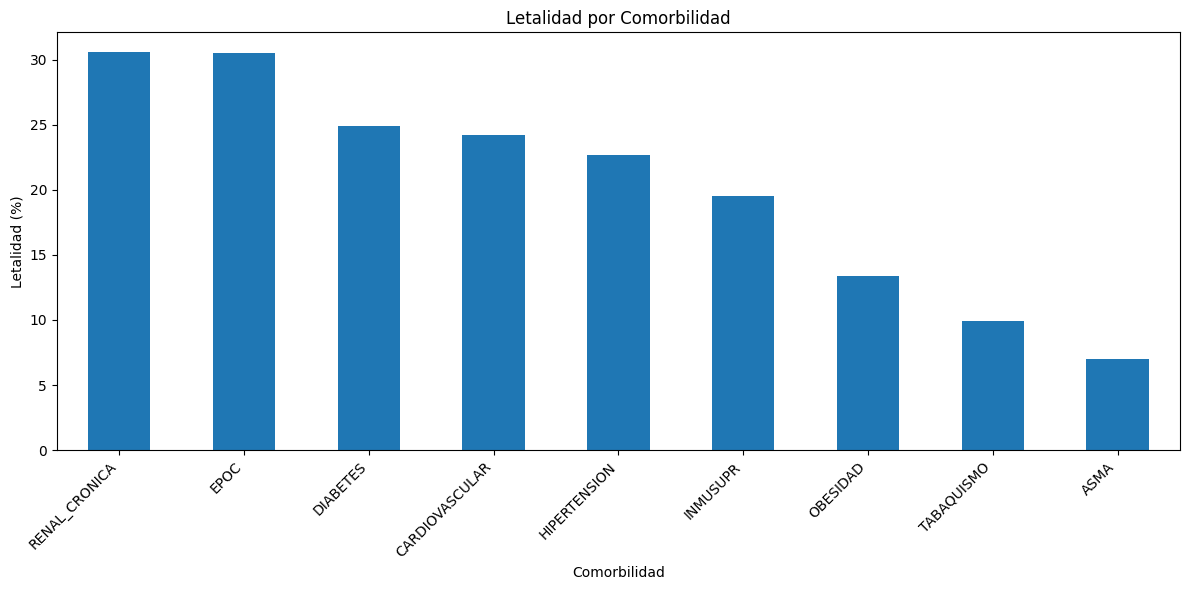


--- Letalidad por Tipo de Paciente ---
TIPO_PACIENTE
1     0.365066
2    30.008385
Name: FECHA_DEF, dtype: float64


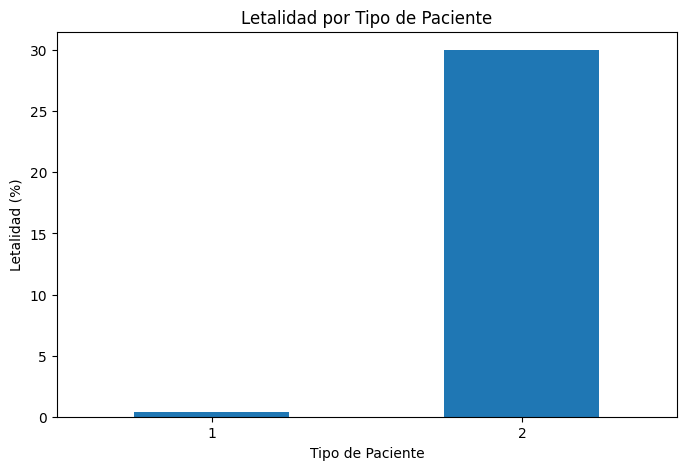


--- Casos por Entidad Federativa ---
ENTIDAD_FEDERATIVA
CIUDAD DE MÉXICO        31574
MÉXICO                  20750
TAMAULIPAS              11293
NUEVO LEÓN               9382
COAHUILA DE ZARAGOZA     7210
Name: count, dtype: int64


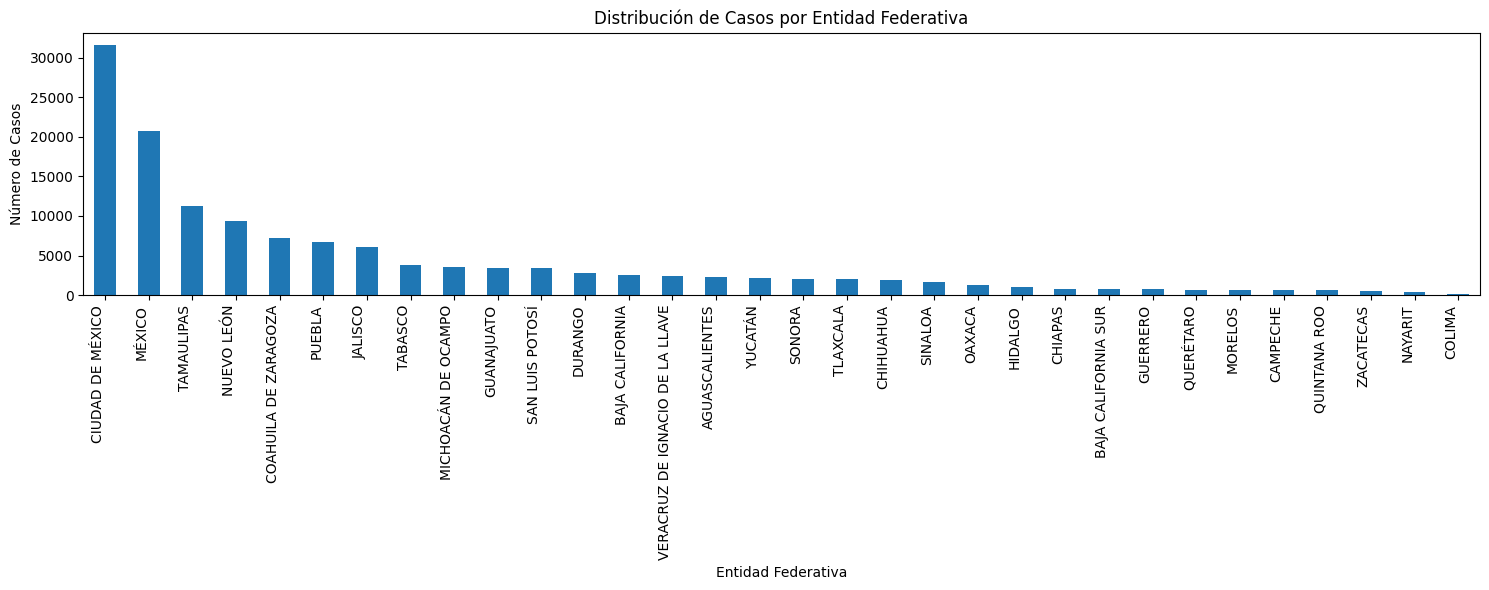


--- Letalidad por Entidad Federativa (Entidades con al menos 100 casos) ---
ENTIDAD_FEDERATIVA
SINALOA            27.080891
MORELOS            23.580786
BAJA CALIFORNIA    21.967602
QUINTANA ROO       20.574887
NAYARIT            20.204604
Name: FECHA_DEF, dtype: float64


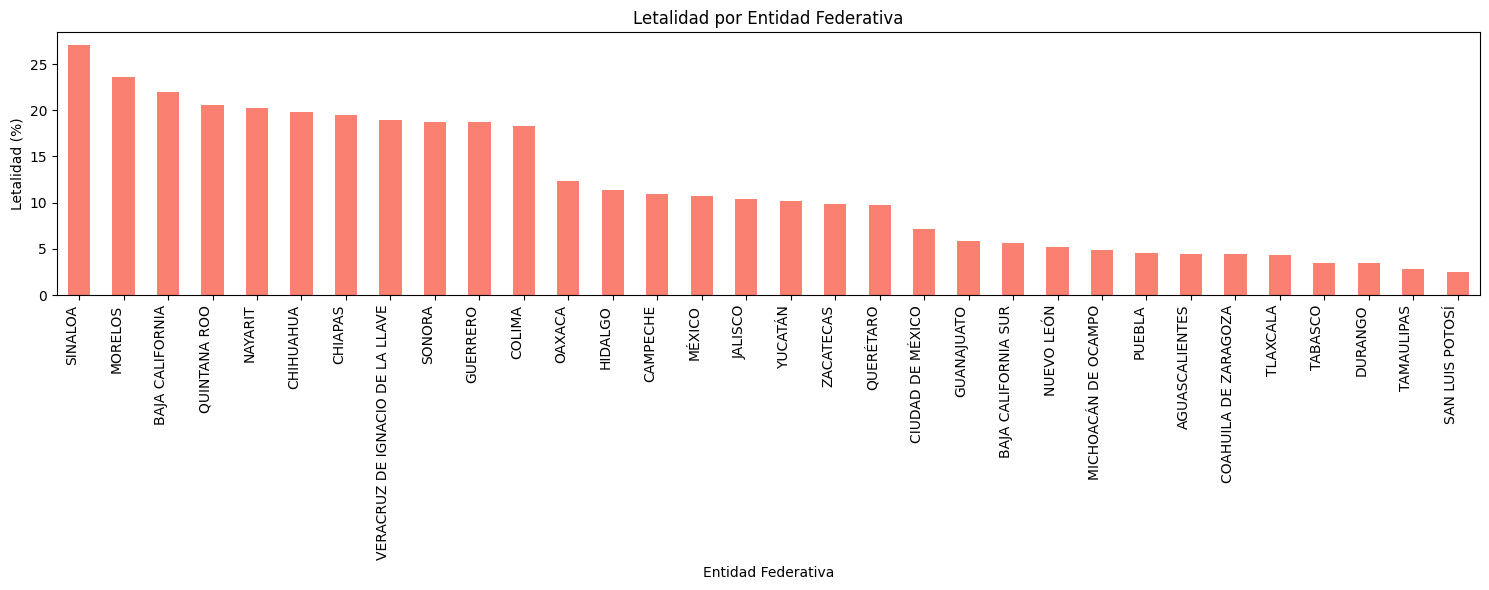

In [ ]:
# 1. Tendencias Temporales (Ampliando tu análisis anterior)
# Agrupa los datos por fecha de ingreso y cuenta los casos
daily_admissions = df_merged.groupby('FECHA_INGRESO').size()

# Calcula el promedio móvil de 7 días
daily_admissions_rolling = daily_admissions.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
daily_admissions.plot(label='Ingresos Diarios')
daily_admissions_rolling.plot(label='Promedio Móvil de 7 Días', linestyle='--')
plt.title('Tendencia Temporal de Ingresos Hospitalarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Ingresos')
plt.legend()
plt.grid(True)
plt.show()

# Agrupar por fecha de fallecimiento y contar las muertes
daily_deaths = df_merged[df_merged['FECHA_DEF'].notna()].groupby('FECHA_DEF').size()

# Calcular el promedio móvil de 7 días
daily_deaths_rolling = daily_deaths.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
daily_deaths.plot(label='Fallecimientos Diarios')
daily_deaths_rolling.plot(label='Promedio Móvil de 7 Días', linestyle='--')
plt.title('Tendencia Temporal de Fallecimientos')
plt.xlabel('Fecha')
plt.ylabel('Número de Fallecimientos')
plt.legend()
plt.grid(True)
plt.show()


# 2. Impacto Demográfico y Comorbilidades en la Mortalidad
# Calcular la letalidad por grupo de edad
# Definir rangos de edad
bins = [0, 18, 30, 45, 60, 75, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df_merged['Grupo_Edad'] = pd.cut(df_merged['EDAD'], bins=bins, labels=labels, right=False)

lethality_by_age_group = df_merged.groupby('Grupo_Edad')['FECHA_DEF'].apply(lambda x: (x.notna().sum() / len(x)) * 100 if len(x) > 0 else 0)
print("\n--- Letalidad por Grupo de Edad ---")
print(lethality_by_age_group)

plt.figure(figsize=(10, 6))
lethality_by_age_group.plot(kind='bar')
plt.title('Letalidad por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calcular la letalidad por sexo
lethality_by_sex = df_merged.groupby('SEXO')['FECHA_DEF'].apply(lambda x: (x.notna().sum() / len(x)) * 100 if len(x) > 0 else 0)
print("\n--- Letalidad por Sexo ---")
print(lethality_by_sex)

plt.figure(figsize=(6, 5))
lethality_by_sex.plot(kind='bar')
plt.title('Letalidad por Sexo')
plt.xlabel('Sexo (1: Mujer, 2: Hombre)')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=0)
plt.show()


# Calcular la letalidad por comorbilidad
print("\n--- Letalidad por Comorbilidad ---")
comorbidity_lethality = {}
for col in comorbidity_cols:
    if col in df_merged.columns:
        subset_with_comorbidity = df_merged[df_merged[col] == 1]
        if len(subset_with_comorbidity) > 0:
            deaths_with_comorbidity = subset_with_comorbidity['FECHA_DEF'].notna().sum()
            lethality = (deaths_with_comorbidity / len(subset_with_comorbidity)) * 100
            comorbidity_lethality[col] = lethality
        else:
            comorbidity_lethality[col] = 0
    else:
         print(f"Advertencia: Columna '{col}' de comorbilidad no encontrada para cálculo de letalidad.")


comorbidity_lethality_series = pd.Series(comorbidity_lethality).sort_values(ascending=False)
print(comorbidity_lethality_series)

plt.figure(figsize=(12, 6))
comorbidity_lethality_series.plot(kind='bar')
plt.title('Letalidad por Comorbilidad')
plt.xlabel('Comorbilidad')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Letalidad por Tipo de Paciente
lethality_by_patient_type = df_merged.groupby('TIPO_PACIENTE')['FECHA_DEF'].apply(lambda x: (x.notna().sum() / len(x)) * 100 if len(x) > 0 else 0)
print("\n--- Letalidad por Tipo de Paciente ---")
print(lethality_by_patient_type)

plt.figure(figsize=(8, 5))
lethality_by_patient_type.plot(kind='bar')
plt.title('Letalidad por Tipo de Paciente')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=0)
plt.show()


# 3. Distribución Geográfica de Casos y Letalidad
# Casos por entidad federativa
cases_by_state = df_merged['ENTIDAD_FEDERATIVA'].value_counts().sort_values(ascending=False)
print("\n--- Casos por Entidad Federativa ---")
print(cases_by_state.head()) # Mostrar los top 5

plt.figure(figsize=(15, 6))
cases_by_state.plot(kind='bar')
plt.title('Distribución de Casos por Entidad Federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Letalidad por entidad federativa (considerar solo entidades con un número suficiente de casos)
min_cases_for_lethality = 100 # Umbral para calcular letalidad
lethality_by_state = df_merged.groupby('ENTIDAD_FEDERATIVA')['FECHA_DEF'].apply(lambda x: (x.notna().sum() / len(x)) * 100 if len(x) >= min_cases_for_lethality else np.nan)
lethality_by_state = lethality_by_state.dropna().sort_values(ascending=False)
print(f"\n--- Letalidad por Entidad Federativa (Entidades con al menos {min_cases_for_lethality} casos) ---")
print(lethality_by_state.head()) # Mostrar los top 5

if not lethality_by_state.empty:
    plt.figure(figsize=(15, 6))
    lethality_by_state.plot(kind='bar', color='salmon')
    plt.title('Letalidad por Entidad Federativa')
    plt.xlabel('Entidad Federativa')
    plt.ylabel('Letalidad (%)')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay entidades con suficientes casos para calcular la letalidad por estado con el umbral especificado.")

**Paso 5: Análisis de Supervivencia**

 **Razonamiento:**

  Utilizar métodos de análisis de supervivencia para estimar y comparar el tiempo hasta el fallecimiento en diferentes grupos, como por sexo o presencia de comorbilidades.

Este bloque utiliza el análisis de supervivencia para comparar las curvas de supervivencia entre grupos.


--- Análisis de Supervivencia por Sexo ---


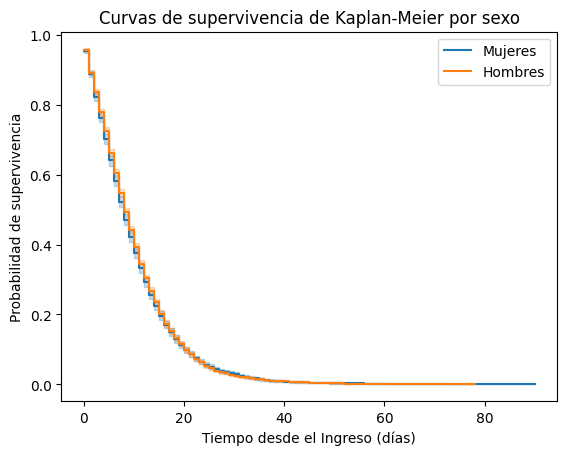


Resultados del Test de Log-rank por Sexo:


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.12 0.29      1.79

None

Conteo de pacientes en df_survival por estado de Diabetes (binario):
DIABETES_binary
0    7045
1    4011
Name: count, dtype: int64

--- Análisis de Supervivencia por Diabetes ---


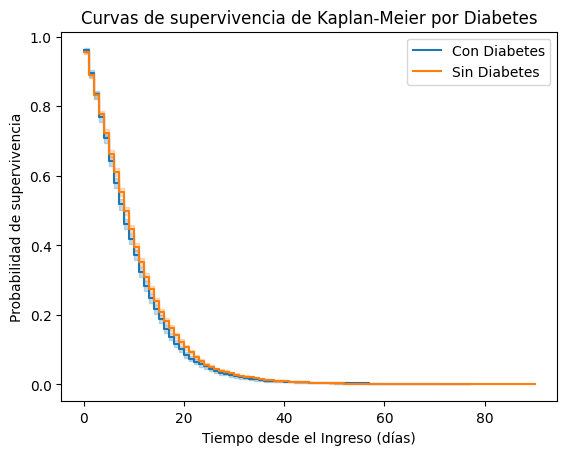


Resultados del Test de Log-rank por Diabetes:


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.64 <0.005      9.82

None


In [ ]:
# Preparar datos para análisis de supervivencia
# Asegurarse de que 'time' y 'event_observed' estén calculados correctamente
df_survival = df_merged.copy()
df_survival['time'] = (df_survival['FECHA_DEF'] - df_survival['FECHA_INGRESO']).dt.days
df_survival['event_observed'] = df_survival['FECHA_DEF'].notna()

# Eliminar filas con valores de tiempo negativos o NaN
df_survival = df_survival.dropna(subset=['time', 'event_observed'])
df_survival = df_survival[df_survival['time'] >= 0]


# Análisis de Supervivencia por Sexo
print("\n--- Análisis de Supervivencia por Sexo ---")
kmf_sex = KaplanMeierFitter()

# Filtrar y ajustar para mujeres
durations_mujer = df_survival[df_survival['SEXO'] == 1]['time']
event_observed_mujer = df_survival[df_survival['SEXO'] == 1]['event_observed']
if not durations_mujer.empty:
    kmf_sex.fit(durations=durations_mujer, event_observed=event_observed_mujer, label="Mujeres")
    ax = kmf_sex.plot()
else:
    print("No hay datos para el grupo de Mujeres.")
    ax = None


# Filtrar y ajustar para hombres
durations_hombre = df_survival[df_survival['SEXO'] == 2]['time']
event_observed_hombre = df_survival[df_survival['SEXO'] == 2]['event_observed']
if not durations_hombre.empty:
    if ax is None:
        kmf_sex.fit(durations=durations_hombre, event_observed=event_observed_hombre, label="Hombres")
        ax = kmf_sex.plot()
    else:
        kmf_sex.fit(durations=durations_hombre, event_observed=event_observed_hombre, label="Hombres")
        kmf_sex.plot(ax=ax)
else:
    print("No hay datos para el grupo de Hombres.")

if ax is not None:
    plt.title("Curvas de supervivencia de Kaplan-Meier por sexo")
    plt.xlabel("Tiempo desde el Ingreso (días)")
    plt.ylabel("Probabilidad de supervivencia")
    plt.show()
else:
    print("No se pudieron generar las curvas de supervivencia por sexo debido a la falta de datos.")


# Realizar test de Log-rank si ambos grupos tienen datos
if not durations_mujer.empty and not durations_hombre.empty:
    results_logrank_sex = logrank_test(durations_mujer, durations_hombre, event_observed_A=event_observed_mujer, event_observed_B=event_observed_hombre)
    print("\nResultados del Test de Log-rank por Sexo:")
    print(results_logrank_sex.print_summary())
else:
     print("\nNo se pudo realizar el Test de Log-rank por Sexo debido a la falta de datos en uno o ambos grupos.")

# ---------------------------------------


# --- Remapear la columna 'DIABETES' ---
# Considerar 1 como "Con Diabetes" y 2 como "Sin Diabetes" (remapear 2 a 0)
# Excluir los valores 98 para este análisis si no está claro su significado
df_survival = df_survival[df_survival['DIABETES'].isin([1, 2])].copy() # Mantener solo 1 y 2
df_survival['DIABETES_binary'] = df_survival['DIABETES'].replace({2: 0}) # Remapear 2 a 0

# Verificar el conteo de pacientes en cada grupo binario
print("\nConteo de pacientes en df_survival por estado de Diabetes (binario):")
print(df_survival['DIABETES_binary'].value_counts())
# ---------------------------------------

# Análisis de Supervivencia por Comorbilidad (Diabetes)
print("\n--- Análisis de Supervivencia por Diabetes ---")
kmf_comorbidity = KaplanMeierFitter()

# Filtrar y ajustar para pacientes con Diabetes (DIABETES_binary == 1)
durations_diabetes = df_survival[df_survival['DIABETES_binary'] == 1]['time']
event_observed_diabetes = df_survival[df_survival['DIABETES_binary'] == 1]['event_observed']

# Filtrar y ajustar para pacientes sin Diabetes (DIABETES_binary == 0)
durations_no_diabetes = df_survival[df_survival['DIABETES_binary'] == 0]['time']
event_observed_no_diabetes = df_survival[df_survival['DIABETES_binary'] == 0]['event_observed']

ax_comorbidity = None

if not durations_diabetes.empty:
    kmf_comorbidity.fit(durations=durations_diabetes, event_observed=event_observed_diabetes, label="Con Diabetes")
    ax_comorbidity = kmf_comorbidity.plot()
else:
    print("No hay datos para el grupo 'Con Diabetes'.")

if not durations_no_diabetes.empty:
    if ax_comorbidity is None:
        kmf_comorbidity.fit(durations=durations_no_diabetes, event_observed=event_observed_no_diabetes, label="Sin Diabetes")
        ax_comorbidity = kmf_comorbidity.plot()
    else:
        kmf_comorbidity.fit(durations=durations_no_diabetes, event_observed=event_observed_no_diabetes, label="Sin Diabetes")
        kmf_comorbidity.plot(ax=ax_comorbidity)
else:
    print("No hay datos para el grupo 'Sin Diabetes'.")


if ax_comorbidity is not None:
    plt.title("Curvas de supervivencia de Kaplan-Meier por Diabetes")
    plt.xlabel("Tiempo desde el Ingreso (días)")
    plt.ylabel("Probabilidad de supervivencia")
    plt.show()
else:
    print("No se pudieron generar las curvas de supervivencia por Diabetes debido a la falta de datos.")


# Realizar test de Log-rank si ambos grupos tienen datos binarios
if not durations_diabetes.empty and not durations_no_diabetes.empty:
    results_logrank_diabetes = logrank_test(durations_diabetes, durations_no_diabetes, event_observed_A=event_observed_diabetes, event_observed_B=event_observed_no_diabetes)
    print("\nResultados del Test de Log-rank por Diabetes:")
    print(results_logrank_diabetes.print_summary())
else:
     print("\nNo se pudo realizar el Test de Log-rank por Diabetes debido a la falta de datos en uno o ambos grupos binarios.")


**Bloque 6: Modelado Predictivo (Regresión Logística)**

**Razonamiento:**

Construir un modelo de clasificación (Regresión Logística en este caso) para predecir la probabilidad de fallecimiento basándose en factores demográficos y comorbilidades.


--- Evaluación del Modelo de Regresión Logística ---
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     31097
           1       0.46      0.16      0.24      2775

    accuracy                           0.92     33872
   macro avg       0.69      0.57      0.60     33872
weighted avg       0.89      0.92      0.90     33872


Matriz de Confusión:
[[30578   519]
 [ 2333   442]]

Área bajo la Curva ROC (AUC):
AUC: 0.93


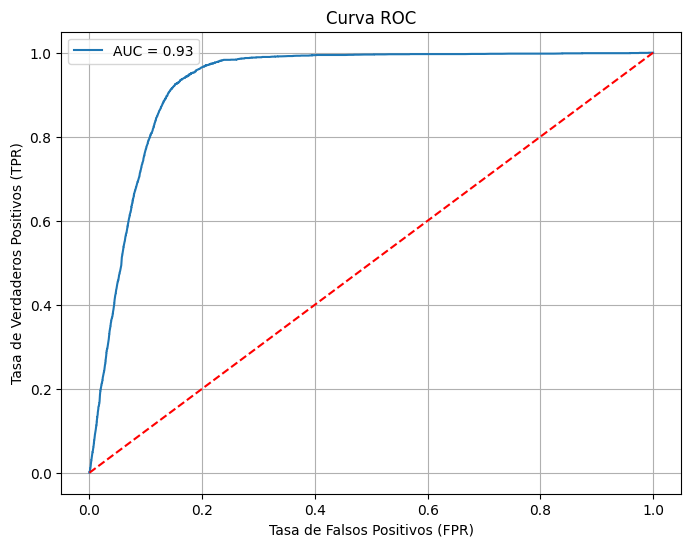


--- Coeficientes del Modelo (Influencia en el riesgo de fallecimiento) ---
           Feature  Coefficient  Odds Ratio
2    TIPO_PACIENTE     4.323229   75.431773
0             EDAD     0.691069    1.995849
1             SEXO     0.288165    1.333977
4             EPOC     0.017865    1.018026
11      TABAQUISMO     0.016244    1.016377
5             ASMA     0.001301    1.001302
10   RENAL_CRONICA     0.000491    1.000491
6         INMUSUPR    -0.000855    0.999145
8   CARDIOVASCULAR    -0.001931    0.998071
7     HIPERTENSION    -0.004822    0.995190
9         OBESIDAD    -0.007341    0.992686
3         DIABETES    -0.019627    0.980565


In [ ]:
# Preparar los datos para el modelado
# Seleccionar características (variables predictoras) y la variable objetivo
# Variable objetivo: 1 si el paciente falleció (FECHA_DEF no es nula), 0 en caso contrario
df_model = df_merged.copy()
df_model['Fallecimiento'] = df_model['FECHA_DEF'].notna().astype(int)

# Seleccionar características relevantes (puedes añadir o quitar según tu análisis)
features = ['EDAD', 'SEXO', 'TIPO_PACIENTE'] + comorbidity_cols
# Asegurarse de que todas las columnas de características existan
features = [col for col in features if col in df_model.columns]

# Crear el conjunto de datos para el modelo
X = df_model[features]
y = df_model['Fallecimiento']

# Manejar posibles valores faltantes en las características (si quedaron después del preprocesamiento)
# Usaremos SimpleImputer para llenar los NaN en X con la mediana de cada columna
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_processed = pd.DataFrame(X_imputed, columns=features)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42, stratify=y) # Usar stratify para mantener la proporción de la variable objetivo


# Escalar las características numéricas (importante para la Regresión Logística)
# Identificar columnas numéricas para escalar
numerical_features = ['EDAD'] # Añadir otras si las hay y no son binarias
if 'EDAD' in features:
    scaler = StandardScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])


# Construir y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000) # Aumentar max_iter si hay problemas de convergencia
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (fallecimiento)

print("\n--- Evaluación del Modelo de Regresión Logística ---")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nÁrea bajo la Curva ROC (AUC):")
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

# Graficar la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretar los coeficientes del modelo (indican la influencia de cada característica)
print("\n--- Coeficientes del Modelo (Influencia en el riesgo de fallecimiento) ---")
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
# Exponenciar los coeficientes para obtener Odds Ratios (para una interpretación más sencilla en Regresión Logística)
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients.sort_values(by='Odds Ratio', ascending=False))

# Discutir los coeficientes: Un Odds Ratio > 1 indica un mayor riesgo de fallecimiento asociado a esa característica (manteniendo las otras constantes). Un Odds Ratio < 1 indica un menor riesgo.

# Nota: La interpretación de los coeficientes es más precisa con variables escaladas, especialmente para EDAD. Los coeficientes de las variables binarias (comorbilidades, sexo, tipo_paciente) se interpretan directamente en relación a su Odds Ratio.

# Consideraciones adicionales para el modelado:
# - Validar el modelo con k-fold cross-validation para una evaluación más robusta.
# - Probar otros modelos de clasificación (por ejemplo, Random Forest, Gradient Boosting).
# - Realizar selección de características para identificar las variables más predictivas.
# - Considerar el desbalance de clases si la proporción de fallecimientos es muy baja.

**Bloque 7: Visualización de Datos**

**Razonamiento:**

Crear visualizaciones informativas y estéticamente agradables para comunicar los hallazgos clave de la exploración, análisis y modelado de datos.


--- Visualización de Hallazgos Clave ---


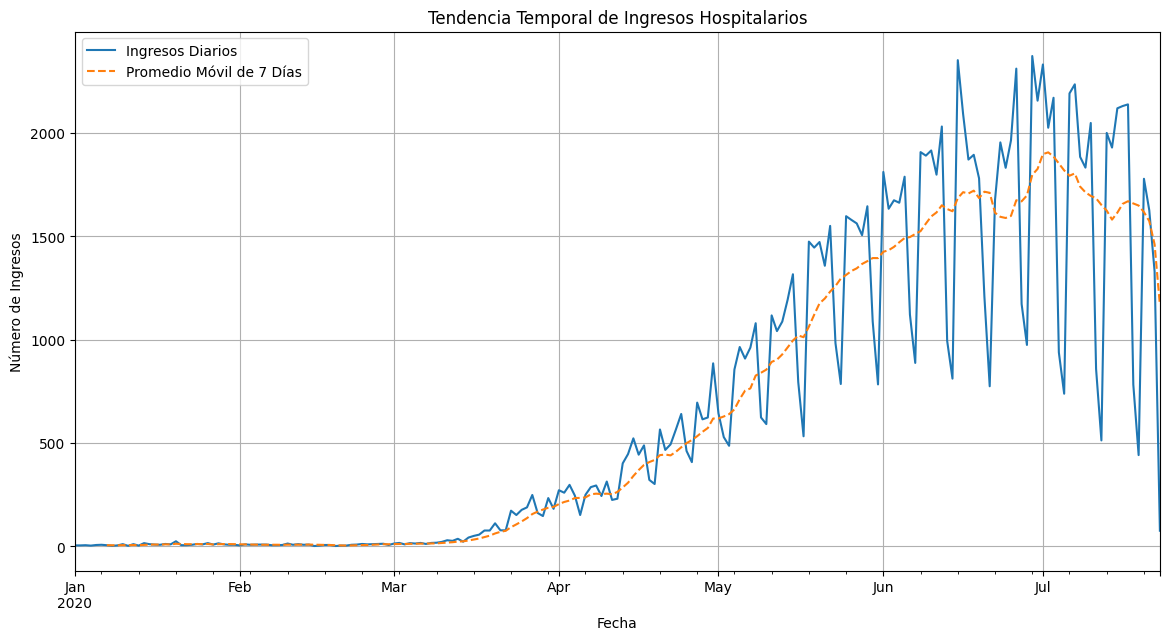

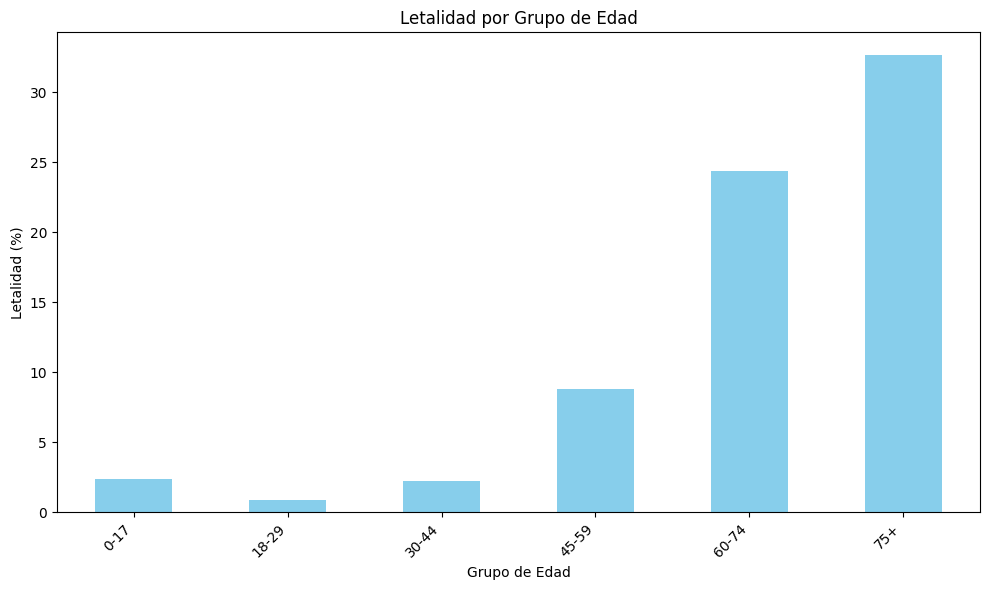

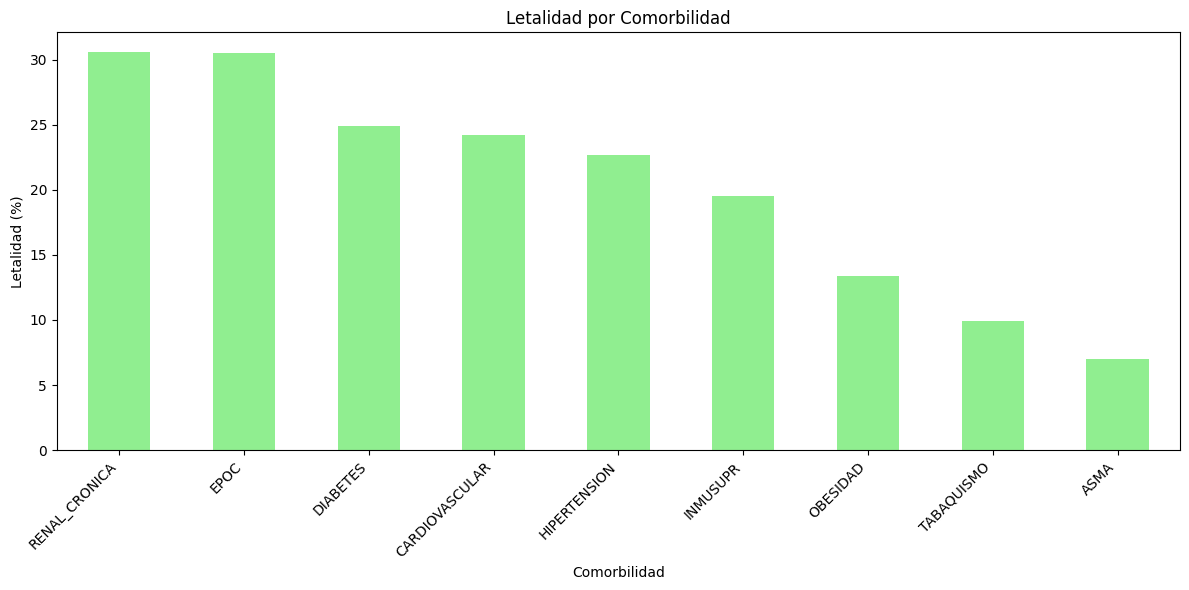

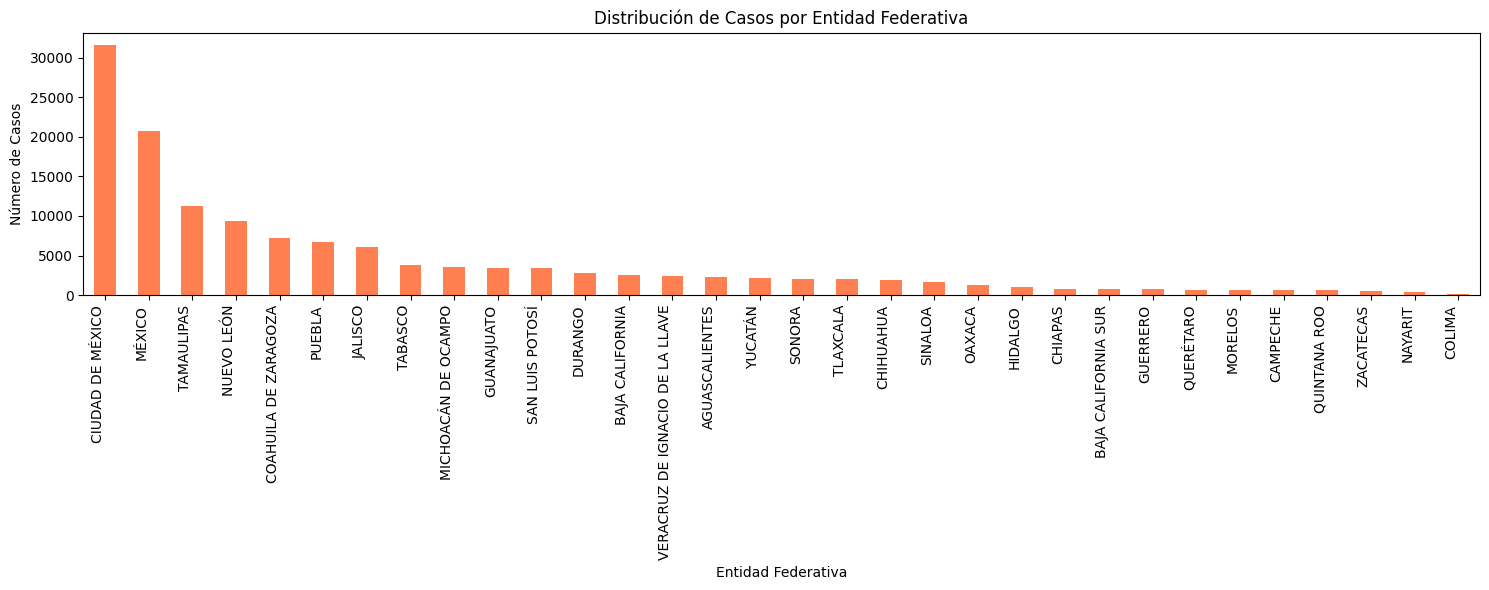

In [ ]:
# Repetir o mejorar visualizaciones clave del EDA y Análisis
print("\n--- Visualización de Hallazgos Clave ---")

# 1. Tendencia Temporal de Ingresos (re-graficar si es necesario para el reporte final)
plt.figure(figsize=(14, 7))
daily_admissions.plot(label='Ingresos Diarios')
daily_admissions_rolling.plot(label='Promedio Móvil de 7 Días', linestyle='--')
plt.title('Tendencia Temporal de Ingresos Hospitalarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Ingresos')
plt.legend()
plt.grid(True)
plt.show()

# 2. Letalidad por Grupo de Edad (re-graficar con posibles ajustes de color/diseño)
plt.figure(figsize=(10, 6))
lethality_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Letalidad por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Letalidad por Comorbilidad (re-graficar con posibles ajustes de color/diseño)
plt.figure(figsize=(12, 6))
comorbidity_lethality_series.plot(kind='bar', color='lightgreen')
plt.title('Letalidad por Comorbilidad')
plt.xlabel('Comorbilidad')
plt.ylabel('Letalidad (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Curva ROC del Modelo Predictivo (ya graficada en el Bloque 6, pero la incluimos aquí como parte de las visualizaciones del reporte)
# Asegúrate de que el código para graficar la curva ROC esté presente en tu notebook.

# 5. Distribución Geográfica de Casos (re-graficar si es necesario)
plt.figure(figsize=(15, 6))
cases_by_state.plot(kind='bar', color='coral')
plt.title('Distribución de Casos por Entidad Federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Puedes añadir otras visualizaciones relevantes basadas en tu análisis, como:
# - Matriz de correlación entre comorbilidades.
# - Distribución de tiempo hasta el fallecimiento.
# - Comparación de distribuciones de edad/comorbilidades entre fallecidos y no fallecidos.

# Consejos para visualizaciones:
# - Usar títulos y etiquetas claras.
# - Elegir tipos de gráficos apropiados para el tipo de datos y el mensaje que quieres transmitir.
# - Considerar el uso de colores que sean accesibles y ayuden a la interpretación.
# - Añadir anotaciones si es necesario para resaltar puntos importantes.

**Paso 8: Reporte y Conclusiones**

**Razonamiento:**

Sintetizar los hallazgos de los pasos anteriores, responder a las preguntas de investigación clave, resumir las ideas obtenidas y proponer posibles próximos pasos o recomendaciones.

In [ ]:
# ### RESUMEN EJECUTIVO:
#
# (Aquí debes escribir un breve resumen de los puntos más importantes de tu análisis. Menciona el objetivo del proyecto, los datos utilizados, la metodología aplicada y los hallazgos clave.)
#
# **Ejemplo:** Este proyecto aplicó una metodología Data-Driven para analizar datos de COVID-19 en México, con el objetivo de identificar tendencias, factores de riesgo y construir un modelo predictivo de mortalidad. Los hallazgos clave incluyen...
#
# ### RESPUESTAS A LAS PREGUNTAS DE INVESTIGACIÓN/NEGOCIO CLAVE:
#
# (Para cada pregunta que planteaste al inicio, responde basándote en los resultados de tu análisis.)
#
# **1. Tendencias Temporales:**
# (Describe lo que observaste en los gráficos de tendencias temporales. ¿Hubo picos? ¿Cuándo ocurrieron? ¿Hay patrones estacionales?)
#
# **2. Impacto Demográfico y Comorbilidades:**
# (Resume tus hallazgos sobre la letalidad por edad, sexo y comorbilidades. ¿Qué grupos tuvieron mayor riesgo? ¿Qué comorbilidades se asociaron con una mayor letalidad?)
#
# **3. Distribución Geográfica:**
# (Describe la distribución de casos y letalidad por estado. ¿Qué estados tuvieron más casos? ¿Qué estados tuvieron una mayor tasa de letalidad?)
#
# **4. Análisis de Supervivencia:**
# (Resume los resultados del análisis de supervivencia. ¿Hubo diferencias significativas en el tiempo de supervivencia entre grupos (sexo, comorbilidades)? ¿Qué implican las curvas de Kaplan-Meier y el test de Log-rank?)
#
# **5. Calidad de Datos:**
# (Menciona los problemas de calidad de datos que identificaste y cómo los manejaste. ¿Qué impacto pudieron tener en el análisis?)
#
# **6. Modelado Predictivo:**
# (Describe el modelo de Regresión Logística que construiste. ¿Qué tan bien se desempeñó (AUC, reporte de clasificación)? ¿Cuáles fueron las características más importantes según los coeficientes? ¿Cómo se puede interpretar el riesgo basándose en estas características?)
#
# ### HALLAZGOS CLAVE ADICIONALES:
#
# (Incluye cualquier otra observación interesante o patrón que hayas descubierto durante la exploración y el análisis.)
#
# ### PERSPECTIVAS O PRÓXIMOS PASOS:
#
# (Basándote en tus hallazgos, ¿qué se podría hacer a continuación? Podría ser:
# - Mejorar el modelo predictivo (probar otros algoritmos, ingeniería de características, manejo de desbalance de clases).
# - Realizar análisis más profundos sobre ciertos grupos o variables.
# - Investigar la calidad de datos en mayor detalle.
# - Recopilar datos adicionales si es necesario.
# - Implementar el modelo para su uso práctico (por ejemplo, en un sistema de soporte a la decisión).)
#
# ### REFLEXIÓN SOBRE LA METODOLOGÍA DATA-DRIVEN APPROACH:
#
# (Comenta cómo la metodología Data-Driven Approach te ayudó a abordar el problema. ¿Cómo facilitó el proceso de ir desde los datos crudos hasta las ideas y un modelo predictivo?)
#
# ---
#
# **Consideraciones para el Reporte Final:**
#
# - Asegúrate de que tus visualizaciones sean claras y bien etiquetadas.
# - Utiliza un lenguaje conciso y fácil de entender.
# - Adapta el nivel de detalle a tu audiencia.
# - Incluye tus reflexiones sobre el proceso y los desafíos encontrados.
# - Presenta tus hallazgos de una manera que responda directamente a las instrucciones de tu trabajo (reportes gráficos digitales, interpretación y análisis de resultados).
#